In [1]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 33s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

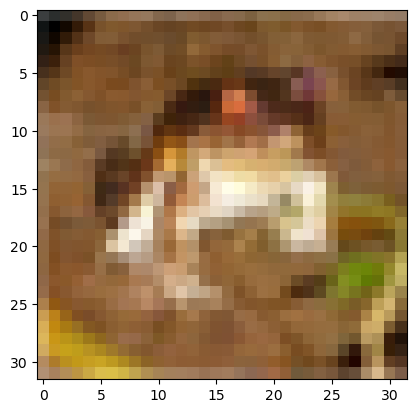

In [6]:
plt.imshow(X_train[0])

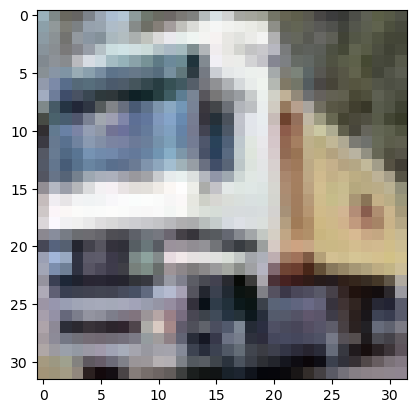

In [7]:
plt.imshow(X_train[1])

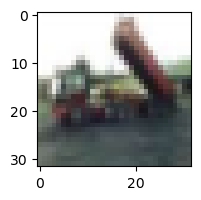

In [11]:
plt.figure(figsize=(5,2))
plt.imshow(X_train[2])

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train.shape

(50000, 1)

In [15]:
classes=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [16]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
classes[9]

'truck'

In [20]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

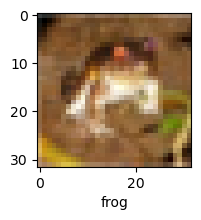

In [21]:
plot_sample(X_train, y_train, 0)

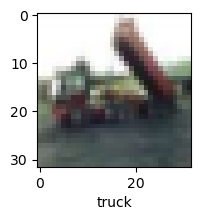

In [22]:
plot_sample(X_train, y_train, 2)

In [23]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [24]:
X_train=X_train/255
X_test=X_test/255

In [26]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8119 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6249 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5419 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4827 - accuracy: 0.4763
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4304 - accuracy: 0.4960


In [27]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5531 - accuracy: 0.4466


[1.5531405210494995, 0.4465999901294708]

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes= [np.argmax(element) for element in y_pred]
print("Classification_report: \n",classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
Classification_report: 
               precision    recall  f1-score   support

           0       0.64      0.40      0.50      1000
           1       0.37      0.82      0.51      1000
           2       0.52      0.11      0.18      1000
           3       0.35      0.25      0.29      1000
           4       0.44      0.36      0.40      1000
           5       0.42      0.39      0.41      1000
           6       0.40      0.70      0.51      1000
           7       0.75      0.32      0.45      1000
           8       0.46      0.74      0.57      1000
           9       0.53      0.37      0.43      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.42     10000
weighted avg       0.49      0.45      0.42     10000



In [31]:
#We_have_to_use_CNN_to_improve_performance_of_the_model
cnn= models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [32]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [33]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4788 - accuracy: 0.4671
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1450 - accuracy: 0.5978
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0139 - accuracy: 0.6481
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9251 - accuracy: 0.6774
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8663 - accuracy: 0.6976
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8156 - accuracy: 0.7166
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7710 - accuracy: 0.7322
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7325 - accuracy: 0.7469
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6969 - accuracy: 0.7589
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6

In [34]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9593 - accuracy: 0.6864


[0.9592606425285339, 0.6863999962806702]

In [38]:
y_test=y_test.reshape(-1)
y_test
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

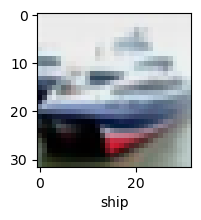

In [39]:
plot_sample(X_test, y_test, 1)

In [40]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[6.6111708e-04, 2.6959546e-03, 3.7135778e-03, 5.0315219e-01,
        1.2942675e-03, 1.8281586e-02, 3.6797710e-03, 2.6880874e-04,
        4.6621078e-01, 4.1887179e-05],
       [4.2901374e-03, 3.3467370e-01, 2.2567603e-05, 2.2086322e-05,
        6.1967495e-07, 6.8064566e-08, 3.6029665e-08, 3.2834365e-08,
        6.5900874e-01, 1.9820081e-03],
       [2.8712858e-02, 6.1781265e-02, 3.9911298e-03, 2.0986898e-02,
        2.5033915e-02, 9.9707290e-04, 1.2685999e-03, 4.3657222e-03,
        7.5352180e-01, 9.9340692e-02],
       [2.3447408e-01, 1.2064926e-02, 5.4596137e-02, 2.7081505e-03,
        1.2403772e-02, 6.2727959e-05, 1.7776499e-02, 6.1995444e-05,
        6.6560775e-01, 2.4397623e-04],
       [5.6299787e-06, 3.9422439e-06, 6.0378080e-03, 3.9766949e-02,
        3.5603306e-01, 2.5521778e-03, 5.9557199e-01, 2.4986181e-05,
        9.4358029e-07, 2.4356023e-06]], dtype=float32)

In [41]:
#list_comprehension
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [43]:
classes[y_classes[1]]

'ship'

In [44]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.49      0.62      1000
           1       0.81      0.80      0.81      1000
           2       0.66      0.49      0.56      1000
           3       0.49      0.58      0.53      1000
           4       0.59      0.70      0.64      1000
           5       0.62      0.60      0.61      1000
           6       0.73      0.80      0.76      1000
           7       0.74      0.77      0.75      1000
           8       0.75      0.82      0.78      1000
           9       0.73      0.82      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.68     10000
weighted avg       0.70      0.69      0.68     10000

